In [1]:
# 필요 라이브러리 임포트

import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# 데이터 경로 설정

sample_img_path = os.getenv("HOME") + '/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel/aiffel/data_augmentation/images/mycat.jpg'

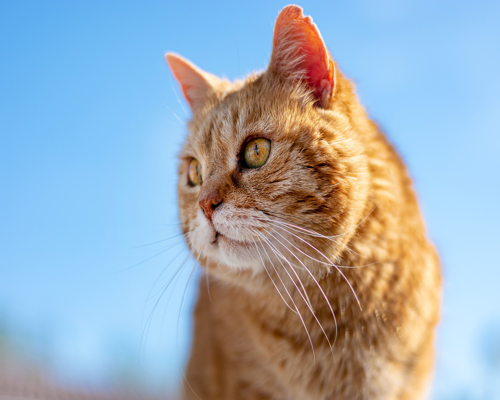

In [3]:
# 이미지 리사이징

image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

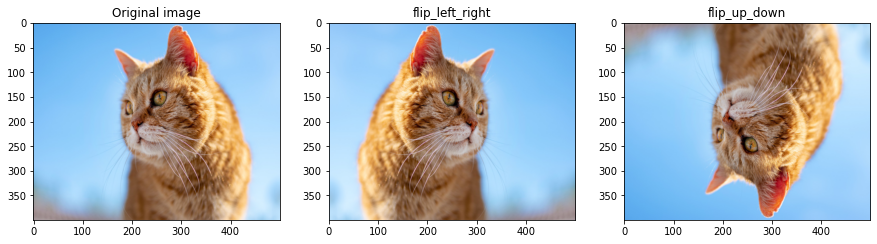

In [4]:
# Flip 적용

# 상하 반전 : flip_left_right 매서드 사용
# 좌우 반전 : flip_up_down 매서드 사용

flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)

flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1, 3, 3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

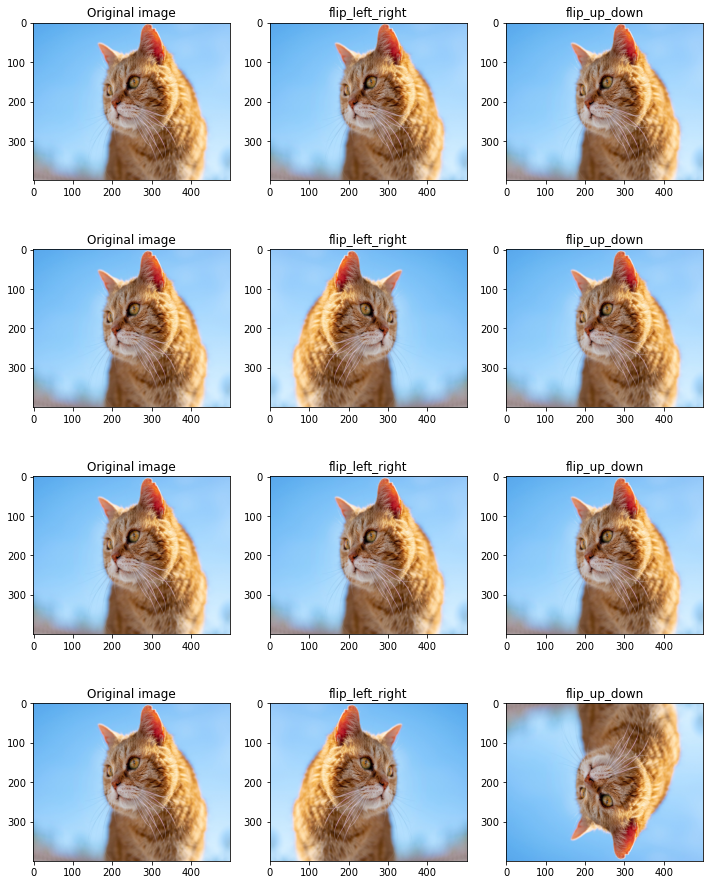

In [5]:
# 확률에 따른 flip 방법 적용

# 좌우 반전 : random_flip_left_right 메서드 사용
# 상하 반전 : random_flip_up_down 메서드 사용

plt.figure(figsize = (12, 16))

row = 4

for i in range(row) : 
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4, 3, i * 3 + 1)
    plt.title('Original image')
    plt.imshow(image)
    
    plt.subplot(4, 3, i * 3 + 2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)
    
    plt.subplot(4, 3, i * 3 + 3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

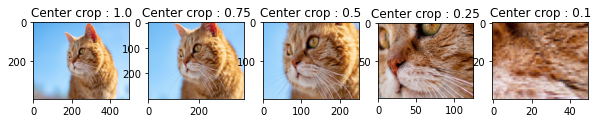

In [6]:
# Center Crop 적용

# 얼마나 확대 할 지 조절하는 매개변수 : central_fraction
# central_fraction 이 1.0 일 경우 원본 이미지와 같다.
# 이미지 대상의 형상을 찾는데 문제가 생기지 않게 적절한 범위 내에서 랜덤하게 조절해야 한다.

plt.figure(figsize = (12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)

for i, frac in enumerate(central_fractions) : 
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1, col + 1, i + 1)
    plt.title(f'Center crop : {frac}')
    plt.imshow(cropped_img)

In [7]:
# 랜덤하게 central_crop 을 적용하는 함수

# 파이썬 random 모듈을 사용하거나 텐서플로우의 랜덤 모듈을 사용
# tf.random.uniform 을 통해 central_fraction 매개변수에 전달할 값을 생성
# 이를 통해 cropped_tensor 생성하는 함수

def random_central_crop(image_tensor, range = (0, 1)) : 
    central_fraction = tf.random.uniform([1], minval = range[0], maxval = range[1], dtype = tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    
    return cropped_tensor

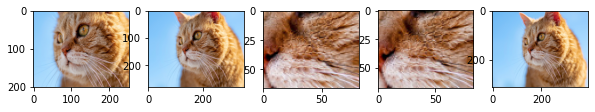

In [8]:
plt.figure(figsize = (12, 15))

col = 5

for i, frac in enumerate(central_fractions) : 
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1, col + 1, i + 1)
    plt.imshow(cropped_img)

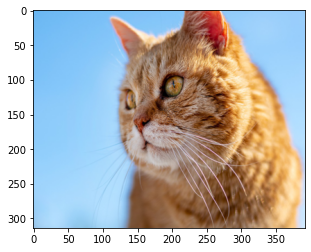

In [9]:
# Brightness 적용

# tf.image.random_grightness() 함수로 사용가능
# tf.image.random_brightness() 만 적용할 경우 이미지 텐서 값의 범위가 
# 0~255 를 초과할 수 있다. 이 경우 rescale 되어 밝기 변경 효과가 상쇄될어 보일 수 있다.
# 따라서 tf.image.random_brightness() 다음에 tf.clip_by_value() 를 적용해줘야 한다.

cropped_tensor = tf.image.random_brightness(image_tensor, max_delta = 255)
plt.imshow(cropped_img)

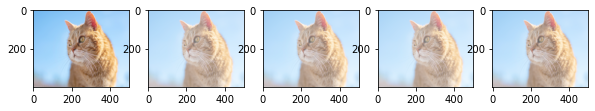

In [10]:
# 5개의 random brightness images

plt.figure(figsize = (12, 15))

col = 5

for i in range(5) : 
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta = 255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1, col + 1, i + 1)
    plt.imshow(cropped_img)